In [1]:
!pip install nltk

## Libraries

In [2]:
import tweepy as tw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

plt.style.use("ggplot")

## Data and NLTK

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
df = pd.read_csv('./Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


In [5]:
df.shape

(568454, 10)

In [8]:
df = df.head(10000)
df.shape

(10000, 10)

In [9]:
df['Score'].value_counts()

5    6183
4    1433
1     932
3     862
2     590
Name: Score, dtype: int64

### lets plot this data for a quick analysis

Text(0, 0.5, 'Counts')

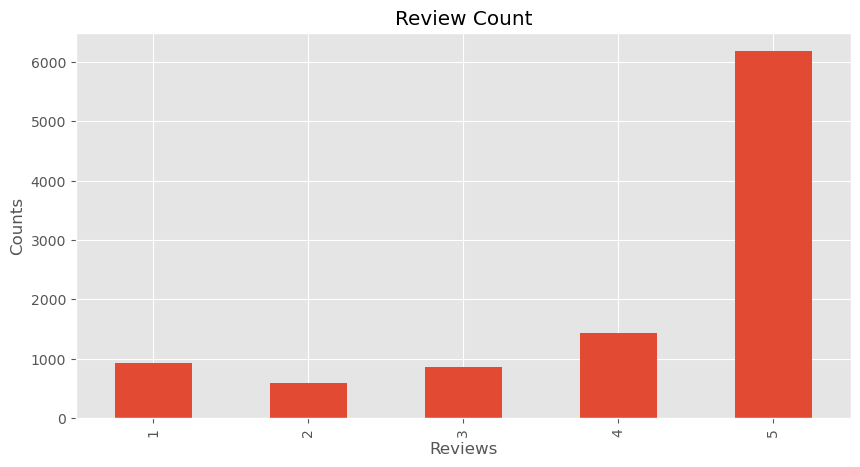

In [10]:
ax = df['Score'].value_counts().sort_index().plot(kind = 'bar', title = "Review Count", figsize = (10,5))
ax.set_xlabel("Reviews")
ax.set_ylabel("Counts")

In [13]:
example = df['Text'][1760]
example

"The reason why I ordered this on-line is because the only Pop Chips they have in my store are the regular and salt and vinegar & barbeque.  I LOVE the sour cream and onion ones - actually I love ALL of them, but it's great to have them in the 100 calorie bag, because if they weren't I wouldn't be able to stop eating them."

In [14]:
## Similar to TextVectorization, we will tokenize the sentence for a quick NLTK overview
tokens = nltk.word_tokenize(example)
tokens[:10]

['The',
 'reason',
 'why',
 'I',
 'ordered',
 'this',
 'on-line',
 'is',
 'because',
 'the']

In [15]:
## part of speech using NLTK
speech = nltk.pos_tag(tokens)
speech[:10]

[('The', 'DT'),
 ('reason', 'NN'),
 ('why', 'WRB'),
 ('I', 'PRP'),
 ('ordered', 'VBD'),
 ('this', 'DT'),
 ('on-line', 'NN'),
 ('is', 'VBZ'),
 ('because', 'IN'),
 ('the', 'DT')]

A detailed description of each of these tags and many other can be found here:
https://stackoverflow.com/questions/15388831/what-are-all-possible-pos-tags-of-nltk

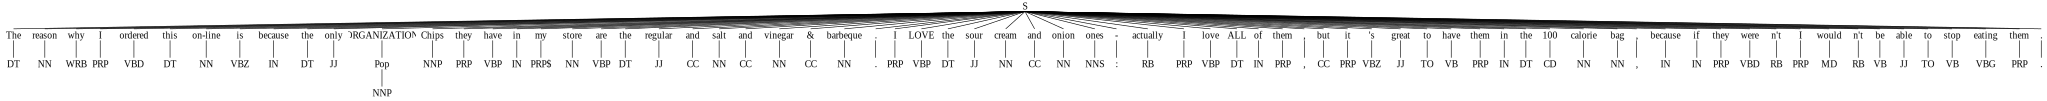

In [16]:
entities = nltk.chunk.ne_chunk(speech)
entities

In [17]:
###  we can also chunk it into a single sentence for ease reading
entities.pprint()

(S
  The/DT
  reason/NN
  why/WRB
  I/PRP
  ordered/VBD
  this/DT
  on-line/NN
  is/VBZ
  because/IN
  the/DT
  only/JJ
  (ORGANIZATION Pop/NNP)
  Chips/NNP
  they/PRP
  have/VBP
  in/IN
  my/PRP$
  store/NN
  are/VBP
  the/DT
  regular/JJ
  and/CC
  salt/NN
  and/CC
  vinegar/NN
  &/CC
  barbeque/NN
  ./.
  I/PRP
  LOVE/VBP
  the/DT
  sour/JJ
  cream/NN
  and/CC
  onion/NN
  ones/NNS
  -/:
  actually/RB
  I/PRP
  love/VBP
  ALL/DT
  of/IN
  them/PRP
  ,/,
  but/CC
  it/PRP
  's/VBZ
  great/JJ
  to/TO
  have/VB
  them/PRP
  in/IN
  the/DT
  100/CD
  calorie/NN
  bag/NN
  ,/,
  because/IN
  if/IN
  they/PRP
  were/VBD
  n't/RB
  I/PRP
  would/MD
  n't/RB
  be/VB
  able/JJ
  to/TO
  stop/VB
  eating/VBG
  them/PRP
  ./.)


## After the basic of NLTK, lets start with actual sentiment analysis
   For this we will use **VADER**:
        
       VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media, and works well on texts from other domains.
Check the repo for more information: https://github.com/cjhutto/vaderSentiment

    It uses "bag of appraoch":
       1.Stop words are removed from here.
       2. Scoring of indiviual word refering to it as a positive or a negative.
       3. Finally combining all the words in the sentence for the final score.
       4. Relation between words isn't taken into account.

In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm 

sia = SentimentIntensityAnalyzer()

In [19]:
### Example check
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [20]:
sia.polarity_scores('you died')

{'neg': 0.783, 'neu': 0.217, 'pos': 0.0, 'compound': -0.5574}

In [21]:
sia.polarity_scores(example)

{'neg': 0.041, 'neu': 0.797, 'pos': 0.163, 'compound': 0.8561}

In [22]:
score_dict = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    text_id = row['Id']
    score_dict[text_id] = sia.polarity_scores(text)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [23]:
score_dict

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [24]:
vaders = pd.DataFrame(score_dict).T
vaders = vaders.reset_index().rename(columns = {'index':'Id'})
vaders = vaders.merge(df, how ='left')

In [25]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


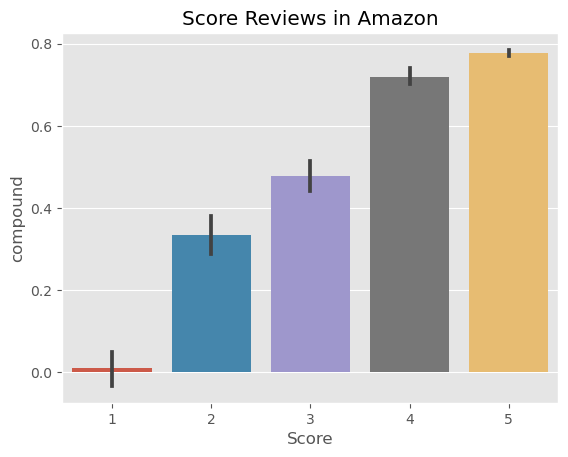

In [26]:
ax = sns.barplot(data = vaders, x = 'Score', y = 'compound')
ax.set_title('Score Reviews in Amazon')
plt.show()

Text(0.5, 1.0, 'Neutral Score')

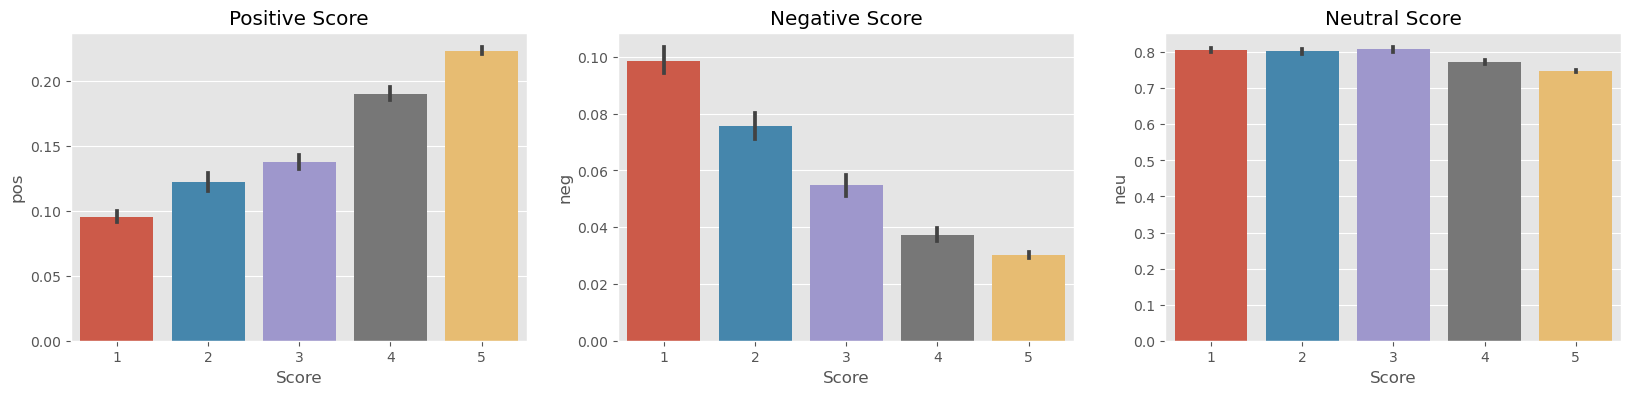

In [27]:
fig, ax = plt.subplots(1, 3, figsize = (20,4))
sns.barplot(data = vaders, x = 'Score', y = 'pos', ax = ax[0])
sns.barplot(data = vaders, x = 'Score', y = 'neg', ax = ax[1])
sns.barplot(data = vaders, x = 'Score', y = 'neu', ax = ax[2])
ax[0].set_title("Positive Score")
ax[1].set_title("Negative Score")
ax[2].set_title("Neutral Score")

In [28]:
### METHOD 2

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [29]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

model.config.vocab_size

50265

In [31]:
example

"The reason why I ordered this on-line is because the only Pop Chips they have in my store are the regular and salt and vinegar & barbeque.  I LOVE the sour cream and onion ones - actually I love ALL of them, but it's great to have them in the 100 calorie bag, because if they weren't I wouldn't be able to stop eating them."

In [32]:
## VADERS Results
sia.polarity_scores(example)

{'neg': 0.041, 'neu': 0.797, 'pos': 0.163, 'compound': 0.8561}

In [33]:
tokenizer(example, return_tensors = 'pt') ##pt = pytorch

{'input_ids': tensor([[    0,   133,  1219,   596,    38,  2740,    42,    15,    12,  1902,
            16,   142,     5,   129,  7975, 39081,    51,    33,    11,   127,
          1400,    32,     5,  1675,     8,  6740,     8, 25271,   359,  2003,
          1610,  3407,     4,  1437,    38, 31124,     5, 16933,  6353,     8,
         19543,  1980,   111,   888,    38,   657, 12389,     9,   106,     6,
            53,    24,    18,   372,     7,    33,   106,    11,     5,   727,
         30648,  3298,     6,   142,   114,    51,  3559,    75,    38,  1979,
            75,    28,   441,     7,   912,  4441,   106,     4,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1]])}

In [34]:
encode = tokenizer(example, return_tensors = 'pt')
output = model(**encode)
output = output[0][0].detach().numpy()
scores = softmax(output)
scores

array([0.00351146, 0.014139  , 0.9823496 ], dtype=float32)

In [35]:
score_dict = {
    'negative': scores[0],
    'neutral':  scores[1],
    'positive': scores[2]
}
score_dict

{'negative': 0.003511463, 'neutral': 0.014139002, 'positive': 0.9823496}

In [36]:
## lets do it for the whole dataset like the previous section

def polarity_scores_model(dataset):
    encode = tokenizer(dataset, return_tensors = 'pt')
    output = model(**encode)
    output = output[0][0].detach().numpy()
    scores = softmax(output)
    score_dict = {
    'negative': scores[0],
    'neutral':  scores[1],
    'positive': scores[2]
    }
    return score_dict

In [37]:
score_dict = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    text_id = row['Id']
    vader_results = sia.polarity_scores(text)
    vader_results_rename = {}
    for key, value in vader_results.items():
        vader_results_rename[f"vader_{key}"] = value
    roberta_results = polarity_scores_model(text)
    results={**vader_results_rename,**roberta_results}
    break

  0%|          | 0/10000 [00:00<?, ?it/s]

In [38]:
vader_results

{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}

In [39]:
roberta_results

{'negative': 0.009624205, 'neutral': 0.04998031, 'positive': 0.9403955}

In [40]:
results

{'vader_neg': 0.0,
 'vader_neu': 0.695,
 'vader_pos': 0.305,
 'vader_compound': 0.9441,
 'negative': 0.009624205,
 'neutral': 0.04998031,
 'positive': 0.9403955}

In [41]:
score_dict = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    try:
        text = row['Text']
        text_id = row['Id']
        vader_results = sia.polarity_scores(text)
        vader_results_rename = {}
        for key, value in vader_results.items():
            vader_results_rename[f"vader_{key}"] = value
        roberta_results = polarity_scores_model(text)
        results={**vader_results_rename,**roberta_results}
        score_dict[text_id] = results
    except RuntimeError:
        print(f'The error persist in id number: {text_id} ')

  0%|          | 0/10000 [00:00<?, ?it/s]

The error persist in id number: 83 
The error persist in id number: 187 
The error persist in id number: 529 
The error persist in id number: 540 
The error persist in id number: 746 
The error persist in id number: 863 
The error persist in id number: 1053 
The error persist in id number: 1070 
The error persist in id number: 1156 
The error persist in id number: 1321 
The error persist in id number: 1375 
The error persist in id number: 1498 
The error persist in id number: 1575 
The error persist in id number: 1796 
The error persist in id number: 1826 
The error persist in id number: 2169 
The error persist in id number: 2248 
The error persist in id number: 2476 
The error persist in id number: 2492 
The error persist in id number: 2584 
The error persist in id number: 2610 
The error persist in id number: 2897 
The error persist in id number: 2898 
The error persist in id number: 2902 
The error persist in id number: 2928 
The error persist in id number: 2942 
The error persist i

In [42]:
vader_results_rename

{'vader_neg': 0.026,
 'vader_neu': 0.811,
 'vader_pos': 0.164,
 'vader_compound': 0.985}

In [43]:
roberta_results

{'negative': 0.033916708, 'neutral': 0.1940266, 'positive': 0.77205676}

In [44]:
final_results = pd.DataFrame(score_dict).T
final_results = final_results.reset_index().rename(columns = {'index':'Id'})
final_results = final_results.merge(df, how ='left')

In [45]:
final_results

,Id,vader_neg,vader_neu,vader_pos,vader_compound,negative,neutral,positive,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9912,9996,0.089,0.852,0.059,-0.5267,0.339595,0.407847,0.252558,B000P41A28,A3A63RACXR1XIL,"A. Boodhoo ""deaddodo""",10,15,1,1204502400,constipation,we switched from the advance similac to the organic product thinking it would be better as we prefer organic foods ourselves. it was a disaster with our 2 month old baby getting constipated and progressively worsening her intake till she fell drastically below her calorie intake. we discontinued the product within five days and switched back to the previous similac and she is fine now. her feeding and calorie intake is back to normal
9913,9997,0.091,0.747,0.162,0.6808,0.010780,0.110858,0.878362,B000P41A28,A5VVRGL8JA7R,Adam,2,3,5,1306368000,Constipation Not A Problem if...,"Like the bad reviews say, the organic formula constipated our daughter. However, by alternating every other feeding with regular (non-organic) formula the problem was resolved. I'm a believer that some organic is better than no organic. We've used this method for 2 months and our daughter is full, happy, and growing well.<br /><br />I would recommend this if you are looking for an organic formula with milk as the first ingredient (as opposed to rice in some of the others)."
9914,9998,0.063,0.811,0.126,0.9305,0.036277,0.215930,0.747794,B000P41A28,A2TGDTJ8YCU6PD,geena77,0,0,5,1347494400,Love this formula!,"I wanted to solely breastfeed but was unable to keep up and had to supplement formula. I chose Similac because they are a very reputable company and I had a ton of it from the hospital. We have used both the powder and ready made and he likes both. He got a little constipated at the beginning but has been on it now for 5 months and no problems. I read some other reviews about sucrose...well, sucrose is just 

In [46]:
final_results.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'negative', 'neutral', 'positive', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text'],
      dtype='object')

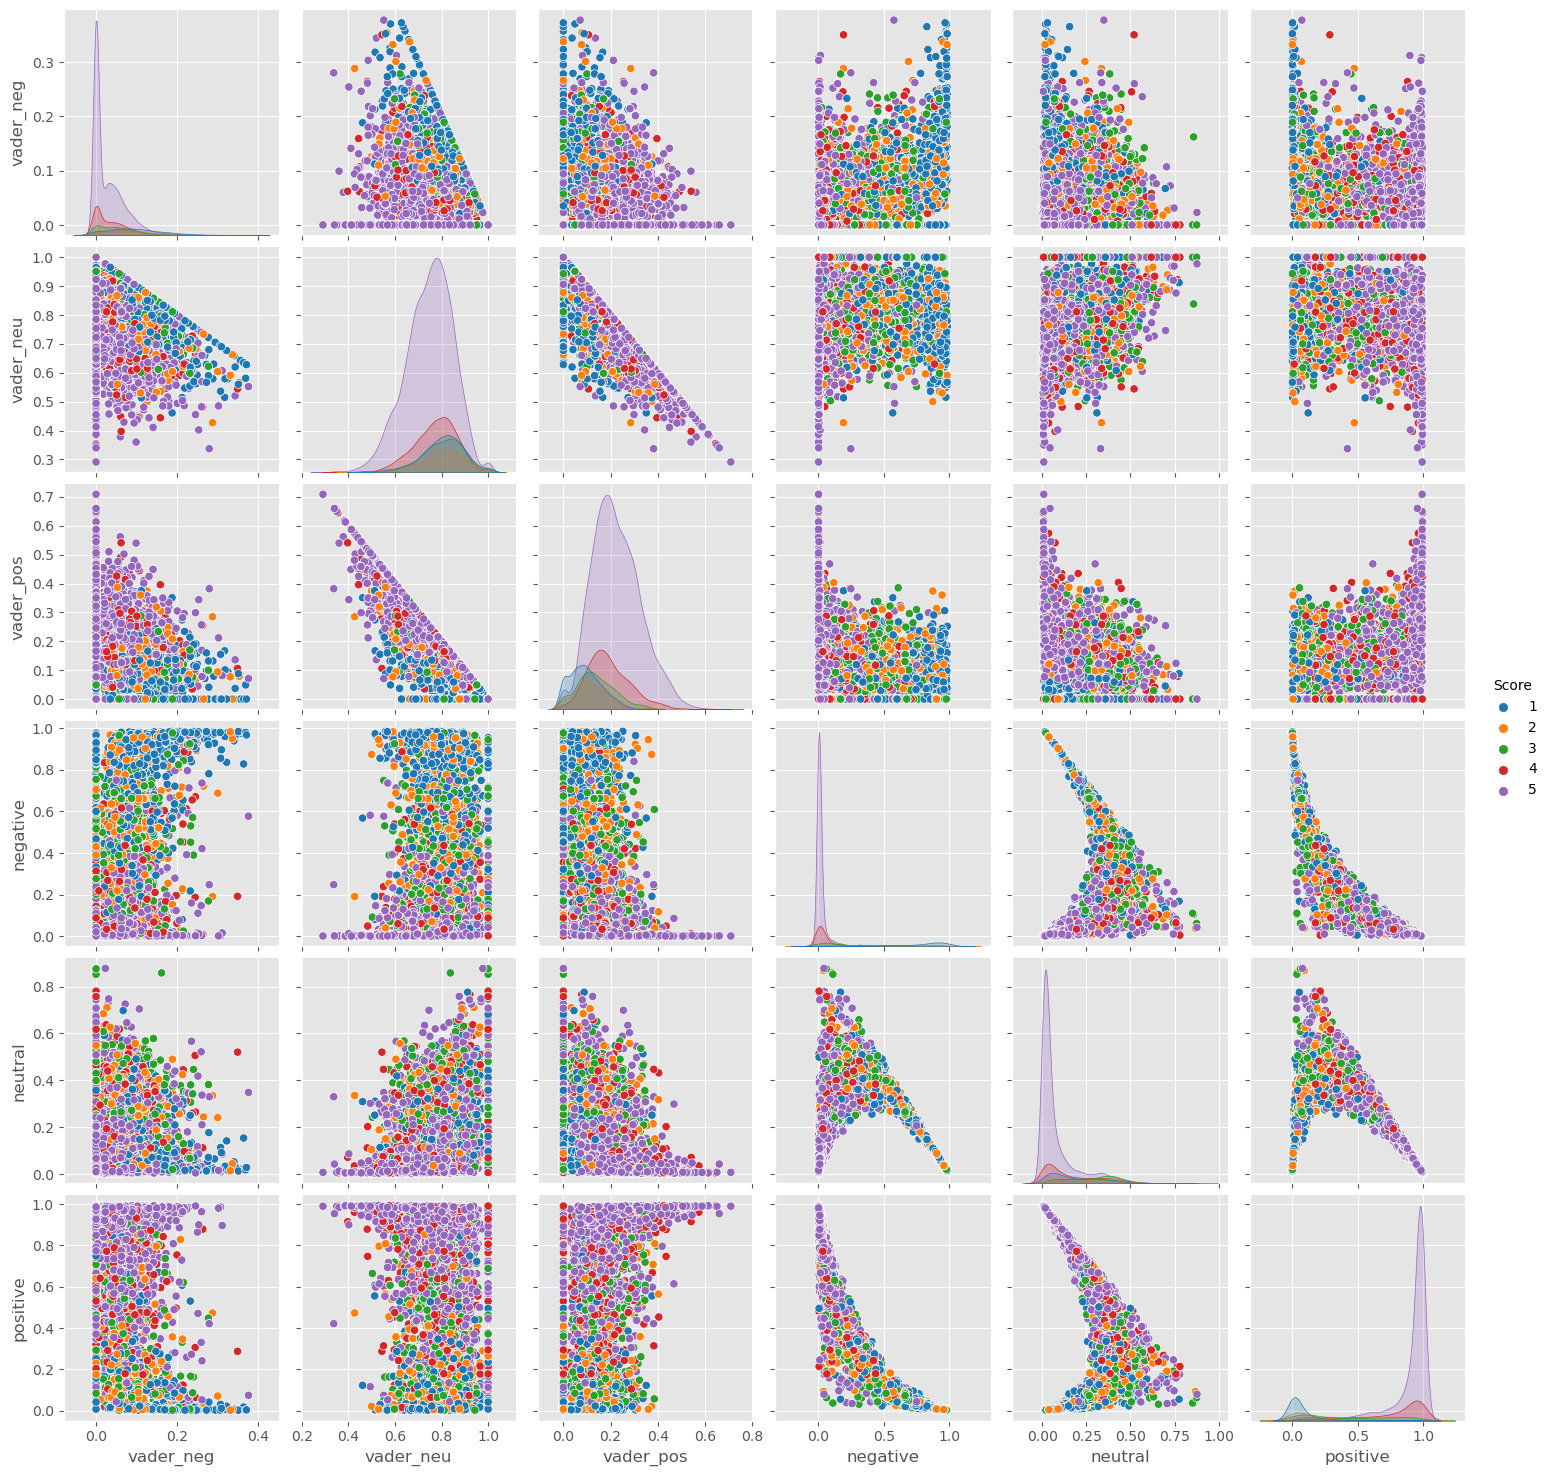

In [47]:
## Quick comparison plot

sns.pairplot(data = final_results, \
             vars = ['vader_neg', 'vader_neu', 'vader_pos',\
                     'negative', 'neutral', 'positive'], \
             hue = 'Score', palette = 'tab10')
plt.show()

## Misplaced Review and Score

        Here we will see cases where the score was actually low but based on the comment, the model predicted that it is a good review. We will also do the opposite cases.

In [53]:
final_results.query('Score == 1')\
.sort_values('positive', ascending = False)["Text"].values[0]

'Bisquick GF is easy to use. Pancakes and muffins are very<br />tasty. The product is quick and easy to use. It makes my day.  Gram'

In [54]:
final_results.query('Score == 1').sort_values('vader_pos', ascending = False)["Text"].values[0]

'This flavor is horrible.  There are many other flavors much better.  Hawaiian Hazelnut is great!  Breakfast in Bed is AWesome!'

In [55]:
final_results.query('Score == 5').sort_values('vader_neg', ascending = False)["Text"].values[0]

'My two cats must not be interested in grass, because it grew but they ignored it. Had no problems growing it.'

In [56]:
final_results.query('Score == 5').sort_values('negative', ascending = False)["Text"].values[0]

'They have a bad taste,i finish giving them away because my son started to cry everytime i tried to give these.I prefer Beech nut or Gerber.Yuck!'

### We can also use pipeline from the transformers to directly do the sentiment analysis

In [58]:
from transformers import pipeline

senti_pipeline  = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [59]:
senti_pipeline('How dare you come visit this place again')

[{'label': 'NEGATIVE', 'score': 0.9609942436218262}]

In [60]:
senti_pipeline('How can you love and hate them?')

[{'label': 'NEGATIVE', 'score': 0.9860877394676208}]

In [61]:
senti_pipeline('How can you love them?')

[{'label': 'POSITIVE', 'score': 0.9926506876945496}]